
# Callin Switzer
Read in all csv files from individual trials for heavy/light flower experiment, and 
combine into a single long dataset, combined with metadata 


In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import os
import pandas as pd
import time
import re
from datetime import datetime
import sys
import csv
import seaborn as sns
from collections import Counter

print(sys.version, "\n")



now = datetime.now()
print("last run on " + str(now))

3.6.1 |Anaconda custom (64-bit)| (default, May 11 2017, 13:04:09) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)] 

last run on 2017-12-07 21:30:53.463660


In [2]:
# define directories
baseDir = os.getcwd()
dataDir = '/Users/cswitzer/Dropbox/SonicationBehavior/SonBehData/SonicationBehavior_HeavyLight/'
metadataDir1 = '/Users/cswitzer/Dropbox/SonicationBehavior/SonBehData/BeeMetaData/'

In [3]:
baseDir

'/Users/cswitzer/Documents/GitRepos/BeeSonicationLearning'

### Read in bee metadata

In [4]:
metadataFile = metadataDir1 + "HeavyLight_BeeMetaData_cleaned.csv"

# read in data
mdta = pd.read_csv(metadataFile, header = 0, index_col = None)

In [5]:
mdta.head()

,BeeColorNum,IT,Hive,FlowerType1,FlowerType2,trainingFile_,dateFrozenOrMarked
0,gold,4.13,3,weighted,sham,BeeGold_26Sept2016_Hive3_W_S/2016_09_26__17_14...,26-Sep-16
1,1,4.07,4,weighted,sham,Bee1_27Sept_Hive4_W_S/2016_09_27__10_52_05_amp...,27-Sep-16
2,2,4.42,4,sham,weighted,Bee2_27Sept_Hive4_S_W/2016_09_27__11_54_44_amp...,27-Sep-16
3,3,4.27,3,sham,weighted,Bee3_28Sept_hive3_S_W/2016_09_28__08_33_35_amp...,28-Sep-16
4,4,4.27,3,weighted,sham,Bee4_28Sept2016_Hive3_W_S/2016_09_28__08_45_02...,28-Sep-16


In [6]:

NoFlightFolder = "/Users/cswitzer/Dropbox/SonicationBehavior/SonBehData/SonicationBehavior_HeavyLight_NoFlights/"

folders = mdta.trainingFile_

# define subfolders
fldrs2 = [folders[ii].split("/")[0] for ii in range(len(folders))]

for ii in range(len(folders)):
    tmpDF = pd.read_table(os.path.join(dataDir, folders[ii]), header = None, sep = ',')

    # add folder name to data frame
    tmpDF[7] = folders[ii]
    fcontents = [f for f in os.listdir(os.path.join(dataDir,fldrs2[ii])) if not f.startswith('.')]
    folderInFolder = [x for x in fcontents if not 'ampFreq.txt' in x]

    # list files in inner folder
    accRecFiles = [x for x in os.listdir(os.path.join(dataDir, fldrs2[ii], folderInFolder[0])) if not x.startswith('.')]
    accRecFiles.sort()
    tmpDF[8] = accRecFiles

    # remove wingbeats
    tmpDF2 = tmpDF.loc[(tmpDF[0] > 220) & (tmpDF[0] < 450)]

    # renumber index
    tmpDF2.index = (np.arange(1, tmpDF2.shape[0] + 1))

    # write to .csv
    tmpDF2.to_csv(NoFlightFolder + fldrs2[ii] + '.csv', 
                 header = False, index = True)
    print(ii)




0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35


In [7]:
## combine csv's all into a single file
csvDir = NoFlightFolder

csvFiles = [f for f in os.listdir(csvDir) if f.endswith('.csv')]

np_array_list = []
for file_ in csvFiles:
    df = pd.read_csv(os.path.join(csvDir, file_),index_col=None, header=None)
    np_array_list.append(df.as_matrix())

comb_np_array = np.vstack(np_array_list)
big_frame = pd.DataFrame(comb_np_array)

big_frame.columns = ['index', 'freq', 'amp', 'datetime', 'rewNum', 'rewTF', 'lowRewAmp', 'highrewAmp', 'BeeNumCol', 'accFile']

print(big_frame.shape) # should be 2360 rows
big_frame.head()

(2360, 10)


,index,freq,amp,datetime,rewNum,rewTF,lowRewAmp,highrewAmp,BeeNumCol,accFile
0,1,250,0.17945,2016_09_28__09_59_13_112,1,T,0,5,Bee7_28Sept2016_Hive3_S_W/2016_09_28__09_58_58...,2016_09_28__09_59_13_112_220_450_test.txt
1,2,300,0.56657,2016_09_28__09_59_14_520,2,T,0,5,Bee7_28Sept2016_Hive3_S_W/2016_09_28__09_58_58...,2016_09_28__09_59_14_520_220_450_test.txt
2,3,400,0.68371,2016_09_28__09_59_15_030,3,T,0,5,Bee7_28Sept2016_Hive3_S_W/2016_09_28__09_58_58...,2016_09_28__09_59_15_030_220_450_test.txt
3,4,410,0.80118,2016_09_28__09_59_15_707,4,T,0,5,Bee7_28Sept2016_Hive3_S_W/2016_09_28__09_58_58...,2016_09_28__09_59_15_707_220_450_test.txt
4,5,370,0.52666,2016_09_28__09_59_16_277,5,T,0,5,Bee7_28Sept2016_Hive3_S_W/2016_09_28__09_58_58...,2016_09_28__09_59_16_277_220_450_test.txt


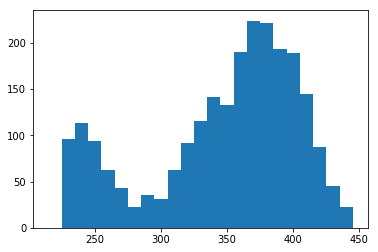

In [8]:
# plot histogram of frequencies
vls = [int(big_frame["freq"][ii]) for ii in range(len(big_frame))]
plt.hist(vls, bins = np.arange(215, 455, 10))
plt.show()

In [9]:
# check to see if datetime and accFile agree
eqs = [big_frame['datetime'][ii][1:25] == big_frame['accFile'][ii][0:24] for ii in range(len(big_frame['datetime']))]

In [10]:
np.sum(np.invert(eqs)) # should be zero if all of them match

0

In [11]:
# find the one that doesn't match
big_frame.loc[np.invert(eqs)] # now they all match

,index,freq,amp,datetime,rewNum,rewTF,lowRewAmp,highrewAmp,BeeNumCol,accFile


In [12]:
trID = big_frame['BeeNumCol'].str.lower()
t2 = [trID[ii].split("/")[0] for ii in range(len(trID))]
# remove "bee"
t3 = [re.sub('bee', '', t2[ii]) for ii in range(len(t2))]
t4 = [t3[ii].split("_")[0] for ii in range(len(t3))]
big_frame["beeID"] = t4
big_frame.head()

,index,freq,amp,datetime,rewNum,rewTF,lowRewAmp,highrewAmp,BeeNumCol,accFile,beeID
0,1,250,0.17945,2016_09_28__09_59_13_112,1,T,0,5,Bee7_28Sept2016_Hive3_S_W/2016_09_28__09_58_58...,2016_09_28__09_59_13_112_220_450_test.txt,7
1,2,300,0.56657,2016_09_28__09_59_14_520,2,T,0,5,Bee7_28Sept2016_Hive3_S_W/2016_09_28__09_58_58...,2016_09_28__09_59_14_520_220_450_test.txt,7
2,3,400,0.68371,2016_09_28__09_59_15_030,3,T,0,5,Bee7_28Sept2016_Hive3_S_W/2016_09_28__09_58_58...,2016_09_28__09_59_15_030_220_450_test.txt,7
3,4,410,0.80118,2016_09_28__09_59_15_707,4,T,0,5,Bee7_28Sept2016_Hive3_S_W/2016_09_28__09_58_58...,2016_09_28__09_59_15_707_220_450_test.txt,7
4,5,370,0.52666,2016_09_28__09_59_16_277,5,T,0,5,Bee7_28Sept2016_Hive3_S_W/2016_09_28__09_58_58...,2016_09_28__09_59_16_277_220_450_test.txt,7


In [13]:
t5 = [t3[ii].split("hive")[1].split("_")[0] for ii in range(len(t3))]
big_frame["hive"] = pd.to_numeric(t5)
big_frame.head()

,index,freq,amp,datetime,rewNum,rewTF,lowRewAmp,highrewAmp,BeeNumCol,accFile,beeID,hive
0,1,250,0.17945,2016_09_28__09_59_13_112,1,T,0,5,Bee7_28Sept2016_Hive3_S_W/2016_09_28__09_58_58...,2016_09_28__09_59_13_112_220_450_test.txt,7,3
1,2,300,0.56657,2016_09_28__09_59_14_520,2,T,0,5,Bee7_28Sept2016_Hive3_S_W/2016_09_28__09_58_58...,2016_09_28__09_59_14_520_220_450_test.txt,7,3
2,3,400,0.68371,2016_09_28__09_59_15_030,3,T,0,5,Bee7_28Sept2016_Hive3_S_W/2016_09_28__09_58_58...,2016_09_28__09_59_15_030_220_450_test.txt,7,3
3,4,410,0.80118,2016_09_28__09_59_15_707,4,T,0,5,Bee7_28Sept2016_Hive3_S_W/2016_09_28__09_58_58...,2016_09_28__09_59_15_707_220_450_test.txt,7,3
4,5,370,0.52666,2016_09_28__09_59_16_277,5,T,0,5,Bee7_28Sept2016_Hive3_S_W/2016_09_28__09_58_58...,2016_09_28__09_59_16_277_220_450_test.txt,7,3


In [14]:
mdta.head()

,BeeColorNum,IT,Hive,FlowerType1,FlowerType2,trainingFile_,dateFrozenOrMarked
0,gold,4.13,3,weighted,sham,BeeGold_26Sept2016_Hive3_W_S/2016_09_26__17_14...,26-Sep-16
1,1,4.07,4,weighted,sham,Bee1_27Sept_Hive4_W_S/2016_09_27__10_52_05_amp...,27-Sep-16
2,2,4.42,4,sham,weighted,Bee2_27Sept_Hive4_S_W/2016_09_27__11_54_44_amp...,27-Sep-16
3,3,4.27,3,sham,weighted,Bee3_28Sept_hive3_S_W/2016_09_28__08_33_35_amp...,28-Sep-16
4,4,4.27,3,weighted,sham,Bee4_28Sept2016_Hive3_W_S/2016_09_28__08_45_02...,28-Sep-16


In [15]:
# merge metadata
bf2 = big_frame.merge(mdta, left_on =['BeeNumCol', 'hive', "beeID"], right_on = ["trainingFile_", "Hive", "BeeColorNum"], how = 'outer', indicator = True)
bf2.head()

,index,freq,amp,datetime,rewNum,rewTF,lowRewAmp,highrewAmp,BeeNumCol,accFile,beeID,hive,BeeColorNum,IT,Hive,FlowerType1,FlowerType2,trainingFile_,dateFrozenOrMarked,_merge
0,1,250,0.17945,2016_09_28__09_59_13_112,1,T,0,5,Bee7_28Sept2016_Hive3_S_W/2016_09_28__09_58_58...,2016_09_28__09_59_13_112_220_450_test.txt,7,3,7,3.98,3,sham,weighted,Bee7_28Sept2016_Hive3_S_W/2016_09_28__09_58_58...,28-Sep-16,both
1,2,300,0.56657,2016_09_28__09_59_14_520,2,T,0,5,Bee7_28Sept2016_Hive3_S_W/2016_09_28__09_58_58...,2016_09_28__09_59_14_520_220_450_test.txt,7,3,7,3.98,3,sham,weighted,Bee7_28Sept2016_Hive3_S_W/2016_09_28__09_58_58...,28-Sep-16,both
2,3,400,0.68371,2016_09_28__09_59_15_030,3,T,0,5,Bee7_28Sept2016_Hive3_S_W/2016_09_28__09_58_58...,2016_09_28__09_59_15_030_220_450_test.txt,7,3,7,3.98,3,sham,weighted,Bee7_28Sept2016_Hive3_S_W/2016_09_28__09_58_58...,28-Sep-16,both
3,4,410,0.80118,2016_09_28__09_59_15_707,4,T,0,5,Bee7_28Sept2016_Hive3_S_W/2016_09_28__09_58_58...,2016_09_28__09_59_15_707_220_450_test.txt,7,3,7,3.98,3,sham,weighted,Bee7_28Sept2016_Hive3_S_W/2016_09_28__09_58_58...,28-Sep-16,both
4,5,370,0.52666,2016_09_28__09_59_16_277,5,T,0,5,Bee7_28Sept2016_Hive3_S_W/2016_09_28__09_58_58...,2016_09_28__09_59_16_277_220_450_test.txt,7,3,7,3.98,3,sham,weighted,Bee7_28Sept2016_Hive3_S_W/2016_09_28__09_58_58...,28-Sep-16,both


In [16]:
bf2.loc[bf2._merge == "right_only", :]

,index,freq,amp,datetime,rewNum,rewTF,lowRewAmp,highrewAmp,BeeNumCol,accFile,beeID,hive,BeeColorNum,IT,Hive,FlowerType1,FlowerType2,trainingFile_,dateFrozenOrMarked,_merge


In [17]:
Counter(bf2._merge) # should be 2360 for both

Counter({'both': 2360})

In [18]:
Counter(bf2.rewTF) # should all be rewards

Counter({' T': 2360})

In [19]:
#get treatment -- note that the treatment switched after 50 rewards every time

bf2["treatment"] = np.nan


In [20]:
for ii in np.unique(bf2.BeeNumCol):
    t1  = np.array(bf2.loc[(bf2.BeeNumCol == ii), "FlowerType1"])[0]
    t2  = np.array(bf2.loc[(bf2.BeeNumCol == ii), "FlowerType2"])[0]

    bf2.loc[(bf2.BeeNumCol == ii) & (bf2.rewNum <= 50),"treatment" ] = str(t1)
    bf2.loc[(bf2.BeeNumCol == ii) & (bf2.rewNum > 50), "treatment"] = str(t2)

bf2.head()

,index,freq,amp,datetime,rewNum,rewTF,lowRewAmp,highrewAmp,BeeNumCol,accFile,...,hive,BeeColorNum,IT,Hive,FlowerType1,FlowerType2,trainingFile_,dateFrozenOrMarked,_merge,treatment
0,1,250,0.17945,2016_09_28__09_59_13_112,1,T,0,5,Bee7_28Sept2016_Hive3_S_W/2016_09_28__09_58_58...,2016_09_28__09_59_13_112_220_450_test.txt,...,3,7,3.98,3,sham,weighted,Bee7_28Sept2016_Hive3_S_W/2016_09_28__09_58_58...,28-Sep-16,both,sham
1,2,300,0.56657,2016_09_28__09_59_14_520,2,T,0,5,Bee7_28Sept2016_Hive3_S_W/2016_09_28__09_58_58...,2016_09_28__09_59_14_520_220_450_test.txt,...,3,7,3.98,3,sham,weighted,Bee7_28Sept2016_Hive3_S_W/2016_09_28__09_58_58...,28-Sep-16,both,sham
2,3,400,0.68371,2016_09_28__09_59_15_030,3,T,0,5,Bee7_28Sept2016_Hive3_S_W/2016_09_28__09_58_58...,2016_09_28__09_59_15_030_220_450_test.txt,...,3,7,3.98,3,sham,weighted,Bee7_28Sept2016_Hive3_S_W/2016_09_28__09_58_58...,28-Sep-16,both,sham
3,4,410,0.80118,2016_09_28__09_59_15_707,4,T,0,5,Bee7_28Sept2016_Hive3_S_W/2016_09_28__09_58_58...,2016_09_28__09_59_15_707_220_450_test.txt,...,3,7,3.98,3,sham,weighted,Bee7_28Sept2016_Hive3_S_W/2016_09_28__09_58_58...,28-Sep-16,both,sham
4,5,370,0.52666,2016_09_28__09_59_16_277,5,T,0,5,Bee7_28Sept2016_Hive3_S_W/2016_09_28__09_58_58...,2016_09_28__09_59_16_277_220_450_test.txt,...,3,7,3.98,3,sham,weighted,Bee7_28Sept2016_Hive3_S_W/2016_09_28__09_58_58...,28-Sep-16,both,sham


In [21]:
#drop unwanted columns
bf3 = bf2.drop(["index","_merge", "FlowerType1", "FlowerType2", "lowRewAmp", "highrewAmp", "BeeColorNum", "Hive", "rewTF", "BeeNumCol"], axis = 1)
bf3 = bf3.rename(index=str, columns={"trainingFile_": "accFileAndFolder"})

bf3.head()

,freq,amp,datetime,rewNum,accFile,beeID,hive,IT,accFileAndFolder,dateFrozenOrMarked,treatment
0,250,0.17945,2016_09_28__09_59_13_112,1,2016_09_28__09_59_13_112_220_450_test.txt,7,3,3.98,Bee7_28Sept2016_Hive3_S_W/2016_09_28__09_58_58...,28-Sep-16,sham
1,300,0.56657,2016_09_28__09_59_14_520,2,2016_09_28__09_59_14_520_220_450_test.txt,7,3,3.98,Bee7_28Sept2016_Hive3_S_W/2016_09_28__09_58_58...,28-Sep-16,sham
2,400,0.68371,2016_09_28__09_59_15_030,3,2016_09_28__09_59_15_030_220_450_test.txt,7,3,3.98,Bee7_28Sept2016_Hive3_S_W/2016_09_28__09_58_58...,28-Sep-16,sham
3,410,0.80118,2016_09_28__09_59_15_707,4,2016_09_28__09_59_15_707_220_450_test.txt,7,3,3.98,Bee7_28Sept2016_Hive3_S_W/2016_09_28__09_58_58...,28-Sep-16,sham
4,370,0.52666,2016_09_28__09_59_16_277,5,2016_09_28__09_59_16_277_220_450_test.txt,7,3,3.98,Bee7_28Sept2016_Hive3_S_W/2016_09_28__09_58_58...,28-Sep-16,sham


In [22]:
# save dataset for analysis
bf3.to_csv('/Users/cswitzer/Dropbox/SonicationBehavior/SonBehData/02_HeavyLight_cleaned.csv', header = True, index = False)

In [23]:
# print system info
import IPython
print(IPython.sys_info())

{'commit_hash': '5a894b9',
 'commit_source': 'installation',
 'default_encoding': 'UTF-8',
 'ipython_path': '/Users/cswitzer/anaconda/envs/python3/lib/python3.6/site-packages/IPython',
 'ipython_version': '5.3.0',
 'os_name': 'posix',
 'platform': 'Darwin-17.2.0-x86_64-i386-64bit',
 'sys_executable': '/Users/cswitzer/anaconda/envs/python3/bin/python',
 'sys_platform': 'darwin',
 'sys_version': '3.6.1 |Anaconda custom (64-bit)| (default, May 11 2017, '
                '13:04:09) \n'
                '[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]'}


In [24]:
# show installed packages and versions
!pip freeze 

alabaster==0.7.10
anaconda-client==1.6.3
anaconda-navigator==1.6.2
anaconda-project==0.6.0
appnope==0.1.0
appscript==1.0.1
asn1crypto==0.22.0
astroid==1.4.9
astropy==1.3.2
Babel==2.4.0
backports.functools-lru-cache==1.4
backports.shutil-get-terminal-size==1.0.0
beautifulsoup4==4.6.0
bitarray==0.8.1
blaze==0.10.1
bleach==1.5.0
bokeh==0.12.5
boto==2.46.1
Bottleneck==1.2.1
cffi==1.10.0
chardet==3.0.3
click==6.7
cloudpickle==0.2.2
clyent==1.2.2
colorama==0.3.9
conda==4.3.30
contextlib2==0.5.5
cryptography==1.8.1
cycler==0.10.0
Cython==0.25.2
cytoolz==0.8.2
dask==0.14.3
datashape==0.5.4
decorator==4.0.11
distributed==1.16.3
docutils==0.13.1
entrypoints==0.2.2
et-xmlfile==1.0.1
fastcache==1.0.2
Flask==0.12.2
Flask-Cors==3.0.2
gevent==1.2.1
greenlet==0.4.12
h5py==2.7.1
HeapDict==1.0.0
html5lib==0.999
idna==2.5
imagesize==0.7.1
ipykernel==4.6.1
ipython==5.3.0
ipython-genutils==0.2.0
ipywidgets==6.0.0
isort==4.2.5
itsdangerous==0.24
jdcal==1.3
jedi==0.10.2
Jinja2==2.9.6
jsonschema==2.6.0
jupyte

In [25]:
# convert to html, so ppl don't have to run python to see code
os.chdir(baseDir)
!jupyter nbconvert --to html 004_CombineTrialsHeavyLightData

[NbConvertApp] Converting notebook 004_CombineTrialsHeavyLightData.ipynb to html
[NbConvertApp] Writing 319413 bytes to 004_CombineTrialsHeavyLightData.html
